# Importing libraries and data


In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from IPython.display import display,HTML

In [2]:
df=pd.read_csv('/home/nisarg/nse_stock.csv')
df.head(20)

,SYMBOL,SERIES,OPEN,HIGH,LOW,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,CLOSE
0,20MICRONS,EQ,37.80,37.80,36.15,37.40,37.05,27130,9.946579e+05,2017-06-28,202,36.85
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.65,4.05,20157058,9.214852e+07,2017-06-28,7353,4.55
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13300.00,13460.55,2290,3.030492e+07,2017-06-28,748,13266.70
3,63MOONS,EQ,61.00,61.90,60.35,61.10,60.65,27701,1.689421e+06,2017-06-28,437,61.00
4,8KMILES,EQ,546.10,548.00,535.00,535.20,547.45,79722,4.320862e+07,2017-06-28,1866,537.45
5,A2ZINFRA,EQ,41.30,43.00,41.25,41.90,41.50,606403,2.553118e+07,2017-06-28,3418,42.00
6,AARTIDRUGS,EQ,539.90,539.90,520.00,522.20,536.55,8560,4.508882e+06,2017-06-28,569,521.85
7,AARTIIND,EQ,890.95,894.90,876.90,890.00,890.00,39201,3.482538e+07,2017-06-28,2778,891.30
8,AARVEEDEN,EQ,58.20,61.20,57.00,59.80,58.85,14401,8.558168e+05,2017-06-28,223,59.50
9,ABAN,EQ,183.00,184.65,180.80,181.90,182.65,447698,8.178944e+07,2017-06-28,5449,182.10


# Input the stock name  

In [3]:
inpstr=input('Enter the name of stock: ')

Enter the name of stock: ACE


In [4]:
#from flask import Flask,redirect,url_for,request
#user=request.form['name']


# Cleaning the data 

In [5]:
df1=df[df['SYMBOL']==inpstr]
df1.shape


(495, 12)

In [6]:
#df1=df[df['SYMBOL']==user]
#df1.shape

In [7]:
df1=df1.sort_values(['TIMESTAMP'],ascending=True)
df1.tail(20)


,SYMBOL,SERIES,OPEN,HIGH,LOW,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,CLOSE
243743,ACE,EQ,138.70,139.70,130.25,133.50,137.50,1213823,1.645065e+08,2017-12-01,9391,132.20
431758,ACE,EQ,134.70,136.00,126.60,129.20,132.20,763366,9.912167e+07,2017-12-04,9141,129.25
307201,ACE,EQ,129.25,142.15,126.40,142.15,129.25,4025061,5.563375e+08,2017-12-05,24591,142.15
208380,ACE,EQ,139.95,146.80,138.00,140.10,142.15,2039563,2.907922e+08,2017-12-06,15854,139.75
286137,ACE,EQ,140.95,148.90,140.00,145.50,139.75,1752000,2.555201e+08,2017-12-07,15609,145.85
271894,ACE,EQ,147.25,149.90,142.25,144.80,145.85,981988,1.443428e+08,2017-12-08,8811,144.30
433582,ACE,EQ,145.35,146.60,140.55,141.80,144.30,474952,6.786859e+07,2017-12-11,4199,141.30
284308,ACE,EQ,141.60,148.70,139.50,143.50,141.30,1156873,1.674973e+08,2017-12-12,10214,142.55
210203,ACE,EQ,143.45,146.80,137.00,140.25,142.55,697246,9.954513e+07,2017-12-13,6035,139.05
241930,ACE,EQ,140.20,142.15,136.60,139.75,139.05,446463,6.213798e+07,2017-12-14,4382,139.20


# Graph of the stock over available data

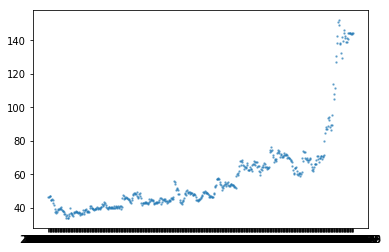

In [8]:
plt.scatter(df1['TIMESTAMP'],df1['CLOSE'],2,alpha=0.5)
plt.show()

In [9]:
df1['15CLOSE']=df1['CLOSE']

arr=np.arange(0,len(df1))
df1['INDEX']=arr

In [10]:
display(HTML(df1.head().to_html('htmlpage.html')))

<IPython.core.display.HTML object>

In [11]:
df1=df1.set_index('INDEX',inplace=False)
#df1.head()
df1.head(16)

,SYMBOL,SERIES,OPEN,HIGH,LOW,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,CLOSE,15CLOSE
INDEX,,,,,,,,,,,,,
0,ACE,EQ,46.85,46.95,46.25,46.50,46.45,148540,6925876.55,2016-01-01,799,46.60,46.60
1,ACE,EQ,46.25,47.50,45.50,46.55,46.60,319336,14875029.10,2016-01-04,1638,46.45,46.45
2,ACE,EQ,46.60,47.60,46.50,47.10,46.45,243448,11451206.85,2016-01-05,1327,47.30,47.30
3,ACE,EQ,47.35,49.35,46.75,47.15,47.30,507537,24434761.60,2016-01-06,2554,47.10,47.10
4,ACE,EQ,46.75,46.80,44.20,44.40,47.10,202265,9200110.80,2016-01-07,1090,44.55,44.55
5,ACE,EQ,44.65,45.75,44.00,44.80,44.55,169597,7598213.20,2016-01-08,955,44.70,44.70
6,ACE,EQ,44.35,46.00,43.05,45.00,44.70,186527,8391456.75,2016-01-11,1015,45.20,45.20
7,ACE,EQ,45.70,46.85,44.60,44.95,45.20,219071,9935457.00,2016-01-12,1069,44.70,44.70
8,ACE,EQ,45.45,45.60,40.80,42.70,44.70,212804,9084693.55,2016-01-13,1136,42.75,42.75


In [12]:
#df1.index = pd.date_range('2016-1-1',periods=df1.shape[0])
#df1.head()

In [13]:
df2=df1['15CLOSE'].shift(periods=-1,axis=0)
df2.dropna()

INDEX
0       46.45
1       47.30
2       47.10
3       44.55
4       44.70
5       45.20
6       44.70
7       42.75
8       41.70
9       39.40
10      37.50
11      38.40
12      36.80
13      37.55
14      38.80
15      39.55
16      39.40
17      39.30
18      39.85
19      40.50
20      39.50
21      38.80
22      38.15
23      38.15
24      37.45
25      36.60
26      36.50
27      35.15
28      34.10
29      35.75
        ...  
464    111.50
465    130.45
466    127.05
467    138.60
468    142.55
469    151.05
470    151.90
471    148.80
472    138.10
473    137.50
474    132.20
475    129.25
476    142.15
477    139.75
478    145.85
479    144.30
480    141.30
481    142.55
482    139.05
483    139.20
484    141.50
485    140.95
486    144.25
487    144.10
488    144.30
489    144.35
490    143.75
491    144.05
492    143.90
493    144.30
Name: 15CLOSE, Length: 494, dtype: float64

In [14]:
 df1.iloc[:480,-1]=df2.iloc[:]

In [15]:
df1.head(40)

,SYMBOL,SERIES,OPEN,HIGH,LOW,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,CLOSE,15CLOSE
INDEX,,,,,,,,,,,,,
0,ACE,EQ,46.85,46.95,46.25,46.50,46.45,148540,6925876.55,2016-01-01,799,46.60,46.45
1,ACE,EQ,46.25,47.50,45.50,46.55,46.60,319336,14875029.10,2016-01-04,1638,46.45,47.30
2,ACE,EQ,46.60,47.60,46.50,47.10,46.45,243448,11451206.85,2016-01-05,1327,47.30,47.10
3,ACE,EQ,47.35,49.35,46.75,47.15,47.30,507537,24434761.60,2016-01-06,2554,47.10,44.55
4,ACE,EQ,46.75,46.80,44.20,44.40,47.10,202265,9200110.80,2016-01-07,1090,44.55,44.70
5,ACE,EQ,44.65,45.75,44.00,44.80,44.55,169597,7598213.20,2016-01-08,955,44.70,45.20
6,ACE,EQ,44.35,46.00,43.05,45.00,44.70,186527,8391456.75,2016-01-11,1015,45.20,44.70
7,ACE,EQ,45.70,46.85,44.60,44.95,45.20,219071,9935457.00,2016-01-12,1069,44.70,42.75
8,ACE,EQ,45.45,45.60,40.80,42.70,44.70,212804,9084693.55,2016-01-13,1136,42.75,41.70


In [16]:
x=df1.iloc[:,2:9]
y=df1.iloc[:,-1]


In [17]:
from sklearn import model_selection
import joblib

In [19]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.4)
print(x_train)

         OPEN    HIGH     LOW    LAST  PREVCLOSE  TOTTRDQTY     TOTTRDVAL
INDEX                                                                    
367     67.50   69.85   66.65   68.70      67.45     220159  1.512053e+07
158     42.60   43.95   42.60   43.20      42.90      95625  4.134492e+06
119     39.40   41.40   39.15   40.80      39.50     139368  5.620982e+06
431     62.00   65.50   62.00   64.05      62.15     210406  1.346978e+07
200     46.20   47.40   45.50   46.30      46.25     206084  9.620991e+06
104     40.55   40.60   39.45   39.90      40.40      78969  3.157249e+06
61      38.15   39.95   38.15   39.10      38.70     117333  4.596393e+06
375     74.10   77.00   72.15   72.70      73.90      83379  6.114987e+06
182     47.70   48.00   45.85   46.05      45.75     662734  3.120935e+07
269     48.70   49.80   47.35   48.75      48.50     184049  8.953420e+06
79      40.30   41.45   39.40   40.50      40.20     193221  7.882523e+06
153     41.65   43.50   41.55   42.90 

In [20]:
model=linear_model.LinearRegression().fit(x_train,y_train,sample_weight=None)
joblib.dump(model,"model.jbl")

['model.jbl']

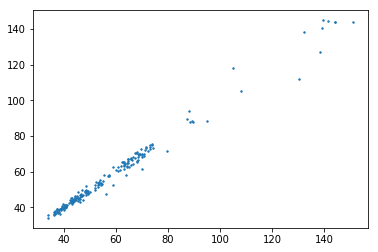

In [21]:
model = joblib.load("model.jbl")
y_pred=model.predict(x_test)

plt.scatter(y_test,y_pred,2)
#plt.show()
plt.savefig('img.jpeg')

In [22]:
model.predict([[138,139,130,138,138,1214040,164009000]])

array([139.37343827])

In [23]:
error=mean_squared_error(y_test,y_pred)
error

7.428202689287622

In [24]:
error_rate=error/len(df1)
error_rate

0.015006470079368934